# Оценки коэффициентов линейной регрессии

Необходимо найти оценки коэффициентов линейной регрессии $y_i = a + bx_i + e_i$ используя 20 точек на отрезке [-1.8; 2] с равномерным шагом равным 0.2. Ошибку $e_i$ считать нормально распределённой с параметрами (0, 1). В качестве эталонной зависимости взять $y_i = 2 + 2x_i + e_i$. При построении оценок коэффициентов использовать два критерия: критерий наименьших квадратов и критерий наименьших модулей. Проделать то же самое для выборки, у которой в значения $y_1$ и $y_{20}$ вносятся возмущения 10 и -10.

Подключаем все нужные библиотеки

In [60]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import scipy.optimize as opt

Эталонная функция:

In [61]:
def reference_function(x):
    return 2 + 2 * x

Добавление шума в эталонную функцию:

In [62]:
def reference_noisy_function(x):
    y = []
    for i in x:
        y.append(reference_function(i) + stats.norm.rvs(0, 1))
    return y

Функция, вычисляющая параметры $\beta_0$ и $\beta_1$ МНК

In [63]:
def get_mnk_parameters(x, y):
    beta_1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_0, beta_1

Функция, возвращающая модуль минимизируемой функции

In [64]:
def least_modulus_method(parameters, x, y):
    alpha_0, alpha_1 = parameters
    sum = 0
    for i in range(len(x)):
        sum += abs(y[i] - alpha_0 - alpha_1 * x[i])
    return sum 

Функция, вычисляющая параметры $\alpha_0$ и $\alpha_1$  МНМ

In [65]:
def get_mnm_parameters(x, y):
    beta_0, beta_1 = get_mnk_parameters(x, y)
    result = opt.minimize(least_modulus_method, [beta_0, beta_1], args=(x, y), method='SLSQP')
    coefs = result.x
    alpha_0, alpha_1 = coefs[0], coefs[1]
    return alpha_0, alpha_1

Метод наименьших квадратов МНК

In [66]:
def MNK(x, y):
    beta_0, beta_1 = get_mnk_parameters(x, y)
    print('beta_0 = ' + str(beta_0), 'beta_1 = ' + str(beta_1))
    y_new = [beta_0 + beta_1 * x_ for x_ in x]
    return y_new     

Метод наименьших модулей МНМ

In [67]:
def MNM(x, y):
    alpha_0, alpha_1 = get_mnm_parameters(x, y)
    print('alpha_0= ' + str(alpha_0), 'alpha_1 = ' + str(alpha_1))
    y_new = [alpha_0 + alpha_1 * x_ for x_ in x]
    return y_new   

Функция построения линейной регрессии:

In [68]:
def plot_linear_regression(x, y):
    y_mnk = MNK(x, y)
    y_mnm = MNM(x, y)
    plt.plot(x, reference_function(x), color='red', label='Модель')
    plt.plot(x, y_mnk, label="МНК", color='pink')
    plt.plot(x, y_mnm, label="МНМ", color='orange')
    plt.scatter(x, y, c='darkorchid', label='Выборка')
    plt.xlim([-1.8, 2])
    plt.grid()
    plt.legend()
    plt.show()

beta_0 = 2.090726575389488 beta_1 = 2.1973831564388577
alpha_0= 2.2257192030727033 alpha_1 = 2.3423877716893


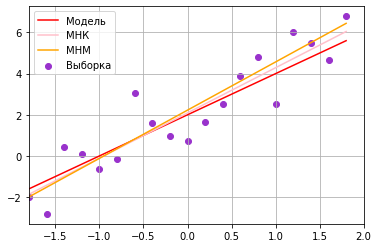

In [69]:
x = np.arange(-1.8, 2, 0.2)
y = reference_noisy_function(x)
plot_linear_regression(x, y)

beta_0 = 2.0669396133808973 beta_1 = 0.4725076483006618
alpha_0= 1.6856237010739041 alpha_1 = 1.9119349587497383


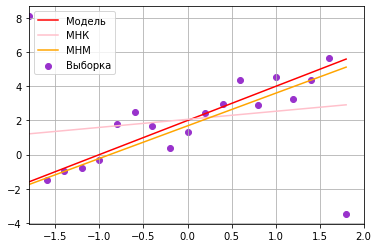

In [70]:
x = np.arange(-1.8, 2, 0.2)
y = reference_noisy_function(x)
y[0] += 10
y[-1] -= 10
plot_linear_regression(x, y)